In [64]:
import tweepy
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessor

from textblob import TextBlob

In [171]:
# Authemnticate
KEY = ''
SECRET_KEY = ''
auth = tweepy.AppAuthHandler(KEY, SECRET_KEY)
api = tweepy.API(auth)

In [172]:
# Setup dataframe
df = pd.DataFrame(columns=['city', 'term', 'tweet', 'time'])

In [173]:
# Gather tweets
terms = ['49ers', 'chiefs', 'superbowl']
cities = ['sf', 'kc']
coords = {'sf': '37.773972,-122.431297,25mi',
          'kc': '39.099724,-94.578331,25mi'}

for city in cities:
    for term in terms:
        term_count = 0
        for tweet in tweepy.Cursor(api.search,
                                   q=term,
                                   geocode=coords[city],
                                   tweet_mode='extended',
                                   count=100).items():
            if 'RT @' not in tweet.full_text:
                df = df.append({'city': city,
                                'term': term,
                                'tweet': tweet.full_text.lower(),
                                'time': tweet.created_at},
                               ignore_index=True)
                term_count += 1
            if term_count == 500:
                break

# Superbowl Sentiment Analysis
#### **Questions**
* What does each city (SanFran, Kansas City) think of their NFL team's Superbowl opponent?
* What does each city think of their own NFL team?
* What are each cities thoughts on the outcome of the game compared to the day before the game?

In [175]:
# Clean tweets
df['tweet'] = df['tweet'].apply(preprocessor.clean)

In [176]:
# Calculate sentiment scores for each tweet and add to dataframe
sentiments = []
subjectives = []
for tweet in df['tweet']:
    scores = TextBlob(tweet).sentiment
    sentiments.append(scores[0])
    subjectives.append(scores[1])

df['sentiment'] = sentiments
df['subjective'] = subjectives

In [177]:
df.loc[(df['city'] == 'sf') & (df['term'] == '49ers')]['sentiment'].mean()

0.14104302109002118

In [178]:
df.loc[(df['city'] == 'sf') & (df['term'] == 'chiefs')]['sentiment'].mean()

0.14007948866857348

In [179]:
df.loc[(df['city'] == 'kc') & (df['term'] == 'chiefs')]['sentiment'].mean()

0.165991175724413

In [180]:
df.loc[(df['city'] == 'kc') & (df['term'] == '49ers')]['sentiment'].mean()

0.1468458107484997

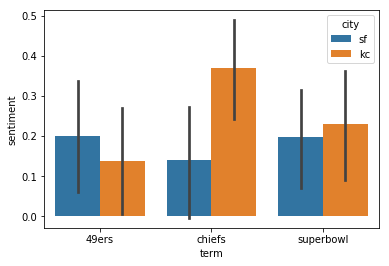

In [197]:
df_sub = df.loc[df['subjective'] > 0.75]
sns.barplot(x='term', y='sentiment', hue='city', data=df_sub)

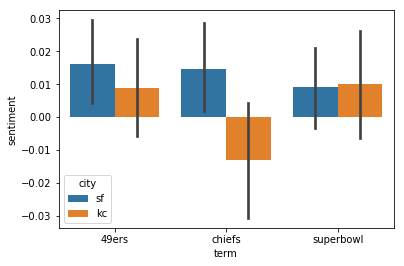

In [196]:
df_obj = df.loc[df['subjective'] <= 0.25]
sns.barplot(x='term', y='sentiment', hue='city', data=df_obj)

### Weird Results
Why does Kansas City have a lower sentiment for the Chiefs than the 49ers? The Chiefs are KC's home team and they won.

In [191]:
df_kc = df.loc[df['city'] == 'kc']
df_sf = df.loc[(df['city'] == 'sf']

In [193]:
df_sf.sort_values(by='sentiment', ascending=False)

,city,term,tweet,time,sentiment,subjective
997,sf,chiefs,🤦‍️ this is so so racist and wow... i just can’t.,2020-02-03 15:25:39,0.100000,1.000000
1017,sf,superbowl,no time to die movie superbowl trailer (2020) ...,2020-02-04 03:21:48,0.100000,0.100000
618,sf,chiefs,twitter posted “share you celebration videos” ...,2020-02-03 23:08:18,0.100000,0.450000
1444,sf,superbowl,"cried over the google commercial, and absolute...",2020-02-03 06:52:02,0.100000,0.450000
265,sf,49ers,boomer who pretends to be a millennial just to...,2020-02-03 20:29:42,0.100000,0.100000
243,sf,49ers,the played really well last night... until the...,2020-02-03 20:52:59,0.100000,0.133333
25,sf,49ers,steve young to join ers greats in .,2020-02-04 03:05:03,0.100000,0.400000
1416,sf,superbowl,the whole superbowl is a lie. the san francisc...,2020-02-03 07:39:27,0.100000,0.450000
1181,sf,superbowl,the season premiere of received a big viewersh...,2020-02-03 19:38:20,0.100000,0.150000
144,sf,49ers,"this is what professional sports can be, and s...",2020-02-03 23:18:14,0.100000,0.100000


In [98]:
# Save
df.to_csv('superbowl_tweets.csv')

In [ ]:
df_kc['tweet'].str.cat()

### Latent Dirichlet Allocation
[Reference](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

def detect_topics(tweets, n_topics=5, n_words=10):
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(df_kc['tweet'])
    
    # Create and fit the LDA model
    lda = LDA(n_components=n_topics, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, n_words)

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [142]:
print('Kansas City')
print('---------------------')
detect_topics(df_kc['tweet'])
print()
print('SanFran')
print('---------------------')
detect_topics(df_sf['tweet'])

Kansas City
---------------------
Topics found via LDA:

Topic #0:
kansas liv chiefs city home bowl super return live victory

Topic #1:
win super bowl ve game played chiefs winning man second

Topic #2:
chiefs fan day chief touch vowed socks grandfather bought pairs

Topic #3:
did going tf chiefs need like ers points bowl super

Topic #4:
city kansas amp chiefs parade superbowl champions fans bowl super

SanFran
---------------------
Topics found via LDA:

Topic #0:
ers win chiefs game got thank moment decided pissed frame

Topic #1:
city kansas chiefs super bowl live liv champion victory parade

Topic #2:
bowl super superbowl winning win people special spanish speaking non

Topic #3:
chiefs day fan chief touch pairs socks grandfather bought vowed

Topic #4:
chiefs team ers kc don didn superbowl like game ll


In [143]:
detect_topics(df['tweet'])

Topics found via LDA:

Topic #0:
fan chiefs day chief touch socks bought vowed pairs grandfather

Topic #1:
ers chiefs game win super bowl team great year just

Topic #2:
win winning chiefs ers thank got bowl super moment decided

Topic #3:
superbowl people non speaking spanish amp kansas nfl bowl super

Topic #4:
city chiefs kansas super bowl liv victory home champion frame


In [160]:
len(df_sf.loc[df_sf['tweet'].str.contains('Spanish')])

0